In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

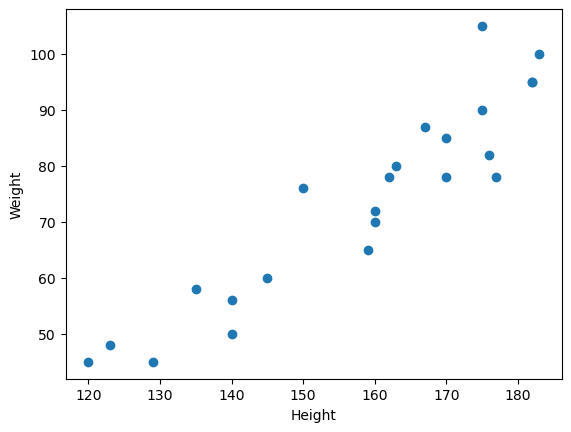

In [3]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
## devide our dataset into indipendent and dependent feature

In [8]:
X=df[['Weight']]##independent 
y=df['Height']##dependent

In [9]:
X.shape,y.shape

((23, 1), (23,))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [13]:
y_train.shape,y_test.shape

((18,), (5,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_test,X_train

(array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]),
 array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]))

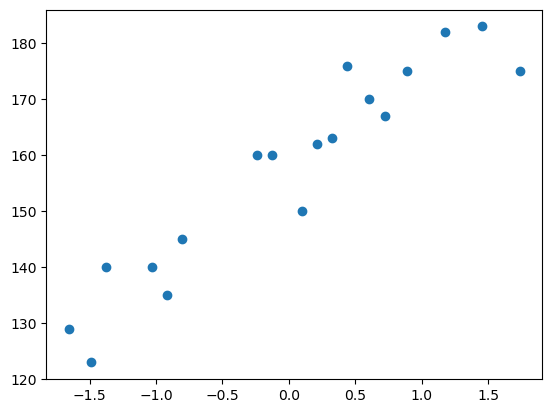

In [19]:
plt.scatter(X_train,y_train)

In [20]:
scaler.transform([[90]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.88886101]])

In [21]:
##model training

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
## training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
regressor.intercept_

157.5

In [26]:
regressor.coef_

array([17.03440872])

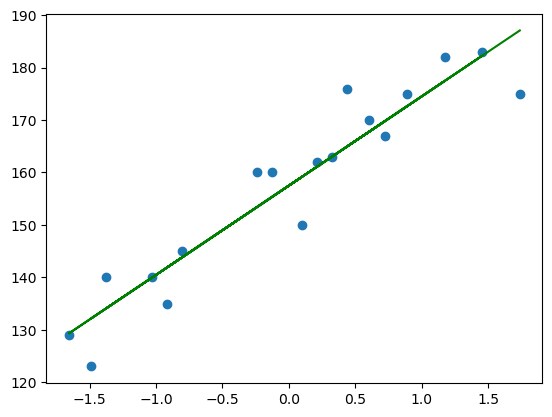

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

In [28]:
##prediction for the test data
y_pred = regressor.predict(X_test)

In [29]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [30]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [31]:
##preformance matrix MAE,MSE,RMSE

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [34]:
##accuracy of the model R squreed and adjusted R squreed
from sklearn.metrics import r2_score

In [35]:
score = r2_score(y_test,y_pred)

In [36]:
score

0.776986986042344

In [40]:
## aujusted R squre
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [41]:
scaler

StandardScaler()

In [42]:
regressor

LinearRegression()